*Foundations of AI 2023-2024*


# The Wolf, Goat and Cabbage problem

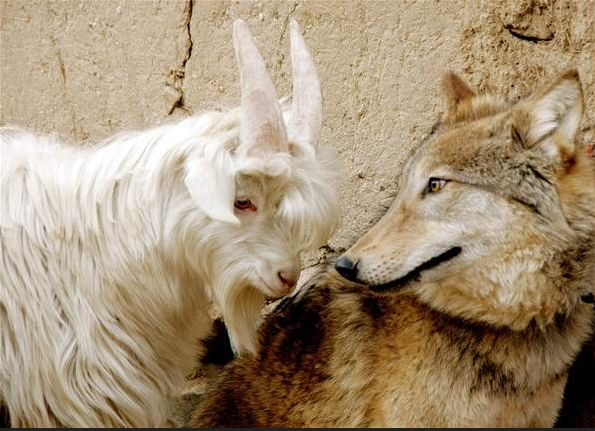

Today we'll work on a [river crossing puzzle](https://en.wikipedia.org/wiki/River_crossing_puzzle) dating back to the 9th century! It's called the [Wolf, Goat and Cabbage](https://en.wikipedia.org/wiki/Wolf,_goat_and_cabbage_problem) problem. The problem is as follows:

> *A farmer with a wolf, a goat, and a cabbage must cross a river by boat. The boat can carry only the farmer and a single item. If left unattended together, the wolf would eat the goat, or the goat would eat the cabbage. How can they cross the river without anything being eaten?*






## 0. Learning objectives

Our learning objectives with this notebook are:

1. *Representing the Wolf, Goat and Cabbage environment*. This involves describing the states of the environment, the available actions, and the dynamics of the environment (how the state of the environment changes in response to the farmer's actions).
2. *Defining a Reflex Agent that solves the problem*. This involves choosing appropriate condition-action rules and implementing them.

## 1. Defining the environment

Let's start by creating a class for the environment. It will have two attributes:
1. `state`:  describes where the farmer and the items are currently, on either the right or left side of the river.
2. `actions`: a list of all the ways in which the farmer can change the state of the world, by moving items around with his boat.

We'll also define a method `get_next_state(starting_state,action)`, which takes a state and an action as input, and returns the next state as output.

#### Small Quiz

Before we get into the code, see if you can answer the following questions:

1. How many *states* are there in the Wolf, Goat and Cabbage environment?
2. How many *actions*?

In [ ]:
import copy

class WolfGoatCabbageWorld:
    def __init__(self, state):
        self.state = tuple(set(x) for x in state) # the initial state is ({'👨🏻', '🐺', '🐐', '🥦'}, {})
        self.actions = [
            'MOVE_FARMER_FROM_LEFT_TO_RIGHT',
            'MOVE_FARMER_FROM_RIGHT_TO_LEFT',
            'MOVE_CABBAGE_AND_FARMER_FROM_LEFT_TO_RIGHT',
            'MOVE_CABBAGE_AND_FARMER_FROM_RIGHT_TO_LEFT'
            'MOVE_GOAT_AND_FARMER_FROM_LEFT_TO_RIGHT',
            'MOVE_GOAT_AND_FARMER_FROM_RIGHT_TO_LEFT',
            'MOVE_WOLF_AND_FARMER_FROM_LEFT_TO_BOAT',
            'MOVE_WOLF_AND_FARMER_FROM_BOAT_TO_LEFT'
        ]

    # define a move action,
    # changing one item's position from one riverbank to the other
    def move(self, state, what, where_from, where_to):
        state[where_from].remove(what)
        state[where_to].add(what)

    # define possible state transitions
    def get_next_state(self, starting_state, action):
        next_state = copy.deepcopy(starting_state)
        left_side, right_side = next_state[0], next_state[1]

        if action == 'MOVE_FARMER_FROM_LEFT_TO_RIGHT':
            if '👨🏻' in left_side:
                self.move(next_state, '👨🏻', 0, 1)

        if action == 'MOVE_FARMER_FROM_RIGHT_TO_LEFT':
            if '👨🏻' in right_side:
                self.move(next_state, '👨🏻', 1, 0)

        if action == 'MOVE_GOAT_AND_FARMER_FROM_LEFT_TO_RIGHT':
            if {'👨🏻', '🐐'} <= left_side:
                self.move(next_state, '👨🏻', 0, 1)
                self.move(next_state, '🐐', 0, 1)

        if action == 'MOVE_WOLF_AND_FARMER_FROM_LEFT_TO_RIGHT':
            if {'🐺','👨🏻'} <= left_side:
                self.move(next_state, '👨🏻', 0, 1)
                self.move(next_state, '🐺', 0, 1)

        if action == 'MOVE_CABBAGE_AND_FARMER_FROM_LEFT_TO_RIGHT':
            if {'🥦','👨🏻'} <= left_side:
                self.move(next_state, '👨🏻', 0, 1)
                self.move(next_state, '🥦', 0, 1)

        if action == 'MOVE_GOAT_AND_FARMER_FROM_RIGHT_TO_LEFT':
            if {'🐐','👨🏻'} <= right_side:
                self.move(next_state, '👨🏻', 1 ,0)
                self.move(next_state, '🐐', 1, 0)

        if action == 'MOVE_WOLF_AND_FARMER_FROM_RIGHT_TO_LEFT':
            if {'🐺','👨🏻'} <= right_side:
                self.move(next_state, '👨🏻', 1, 0)
                self.move(next_state, '🐺', 1, 0)

        if action == 'MOVE_CABBAGE_AND_FARMER_FROM_RIGHT_TO_LEFT':
            if {'🥦','👨🏻'} <= right_side:
                self.move(next_state, '👨🏻', 1, 0)
                self.move(next_state, '🥦', 1, 0)

        return next_state

Let's initialize a world.  All items and the farmer start on the left side of the river.

In [ ]:
world = WolfGoatCabbageWorld((['👨🏻', '🐺', '🐐', '🥦'],[]))
world.state

({'🐐', '🐺', '👨🏻', '🥦'}, set())

Let's execute one action and see how the state of the world gets updated.
We'll make the farmer take the goat over to the left side.

In [ ]:
new_state = world.get_next_state(world.state,'MOVE_GOAT_AND_FARMER_FROM_LEFT_TO_RIGHT')
world.state = new_state
world.state

({'🐺', '🥦'}, {'🐐', '👨🏻'})

Let's create a simple function that checks whether a state is "safe". A state is unsafe if the wolf and the goat, or the goat and the cabbage, are left alone on one side of the river. Later, we'll use this function to check if our reflex agents behave correctly and avoid these kinds of situations.

In [ ]:
def safe(state):
  left_side, right_side = state[0], state[1]
  wolf_goat_alone = any([{'🐺', '🐐'} <= left_side and '👨🏻' in right_side, {'🐺', '🐐'} <= right_side and '👨🏻' in left_side])
  goat_cabbage_alone = any([{'🥦', '🐐'} <= left_side and '👨🏻' in right_side, {'🥦', '🐐'} <= right_side and '👨🏻' in left_side])
  return not(wolf_goat_alone or goat_cabbage_alone)

In [ ]:
safe(({'🐺', '🐐'}, {'🥦', '👨🏻'})) # an unsafe state

All good! Let's move on and define our reflex agent.

## 2. A simple reflex agent

Remember that a simple reflex agent operates according to a set of **condition-action rules**, each with the following format:

> **IF** *current-percept-meets-some-condition*, **THEN** *perform-some-action*

These rules must prescribe *one* action in response to *any* possible percept that the agent might receive.

So, how many rules do we need to program a reflex agent in this context? The River Crossing environment is fully observable. This means that the agent can see everything that's going on at any point in time; he knows the exact location of every entity. Since there are $2^4=16$ possible world states, the agent can get 16 different world views, or percepts. So, a reflex agent in this environment can be defined by, at most, $16$ condition-action rules: one prescribing what to do when the agent sees the state `({'🐐', '🐺', '👨🏻', '🥦'}, {})`, another one for `({'🐺', '🥦'}, {'🐐', '👨🏻'})`, and so on.

We sketch a reflex agent below with 5 condition-action rules. Each rule checks whether certain condition is met, concerning the location of some items, and triggers an action in response to this condition.

These rules are executable from the initial state and they ensure that the agent solves the River Crossing problem starting from that point. However, a reflex agent must have a response for every possible percept it might encounter. The 5 rules below do not match every possible percept. So, strictly speaking, we would need some add some more rules to describe how the agent acts in all circumstances.

In [ ]:
class ReflexAgent:
  def __init__(self, name):
        self.name = name
  def choose_action(self, percept):
    left_side, right_side = percept[0], percept[1]
    # if the agent perceives that 'everyone is on left side', it chooses the action 'MOVE_GOAT_AND_PLAYER_FROM_LEFT_TO_RIGHT'
    if {'👨🏻', '🐺', '🐐', '🥦'} == left_side or {'👨🏻', '🐐'} == left_side:
      action = 'MOVE_GOAT_AND_FARMER_FROM_LEFT_TO_RIGHT'
    elif  {'👨🏻', '🐺', '🥦'} == right_side or {'👨🏻', '🐐'} == right_side:
      action = 'MOVE_FARMER_FROM_RIGHT_TO_LEFT'
    elif {'👨🏻', '🐺', '🥦'} == left_side:
      action = 'MOVE_CABBAGE_AND_FARMER_FROM_LEFT_TO_RIGHT'
    elif {'👨🏻', '🐐', '🥦'} == right_side:
      action = 'MOVE_GOAT_AND_FARMER_FROM_RIGHT_TO_LEFT'
    elif {'👨🏻', '🐐', '🐺'} == left_side:
      action = 'MOVE_WOLF_AND_FARMER_FROM_LEFT_TO_RIGHT'
    return action

Now let's see what happens if this agent interacts with the environment for 7 time-steps.

In [ ]:
# initialize world
world = WolfGoatCabbageWorld([['👨🏻', '🐺', '🐐', '🥦'],[]])
# initialize agent
agent = ReflexAgent("Winner-v1")
# interact for 7 time-steps
for i in range(7):
  print(f"Timestep {i}:\n- Current state: {world.state}")
  # choose action given current percept
  action = agent.choose_action(world.state)
  print(f"- Chosen action: {action}")
  # execute action and update world state
  new_state = world.get_next_state(world.state,action)
  print(f"- Next state: {new_state}")
  # check that we haven't reached an unsafe state
  assert(safe(new_state))
  world.state = new_state

## 3. Your turn: defining your own reflex agent

The agent we described solves the problem. However, it is not the only reflex agent that can do so. To finish this notebook, you'll code your own successful Reflex Agent, `Winner-v2`.

First, define a new Reflex Agent with new condition-action rules.

In [ ]:
class ReflexAgent:
  def __init__(self, name):
        self.name = "Winner-v1"
  def choose_action(self, percept):
    left_side, right_side = percept[0], percept[1]
    '''
    YOUR CODE GOES HERE
    '''
    return action

Starting from the initial state of the world, how many time-steps does your agent need to reach the goal state? Let that number be $n$. We leave it at 7 in the code below, but you can change it if you need to.

As we did before, initialize an environment, and let the agent act for $n$ timesteps. Make sure that the interaction reaches the right end state, and that no unsafe states are visited at any point in time.

In [ ]:
# initialize world
world = WolfGoatCabbageWorld([['👨🏻', '🐺', '🐐', '🥦'],[]])
# initialize agent
agent = ReflexAgent("Winner-v2")
# interact for n time-steps
n = 7
for i in range(n):
  print(f"Timestep {i}:\n- Current state: {world.state}")
  # choose action given current percept
  action = agent.choose_action(world.state)
  print(f"- Chosen action: {action}")
  # execute action and update world state
  new_state = world.get_next_state(world.state,action)
  print(f"- Next state: {new_state}")
  # check that we haven't reached an unsafe state
  assert(safe(new_state))
  world.state = new_state